<a href="https://colab.research.google.com/github/wendell8/Logica_Fuzzy/blob/vinteum/Learneing_Fuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-fuzzy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print('Hello, World!')

Hello, World!


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [ ]:
 qualidade = ctrl.Antecedent(np.arange(0,11,1), 'qualidade')
 servico = ctrl.Antecedent(np.arange(0,11,1),'serviço')

In [ ]:
gorjeta = ctrl.Consequent(np.arange(0,21,1),'gorjeta')

In [ ]:
qualidade.automf(number=3, names = ['ruim', 'boa', 'saborosa'])
servico.automf(number = 3, names = ['ruim', 'aceitavel','ótimo'])

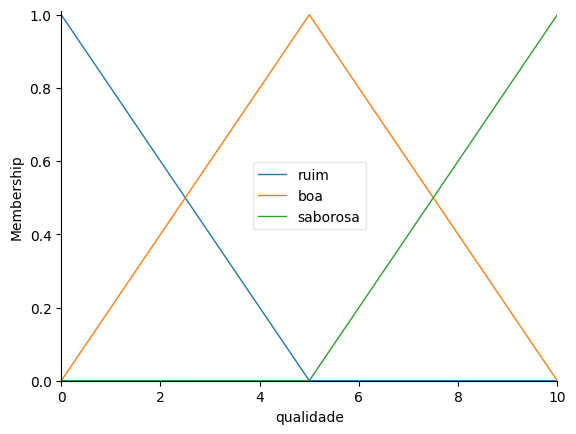

In [ ]:
qualidade.view()

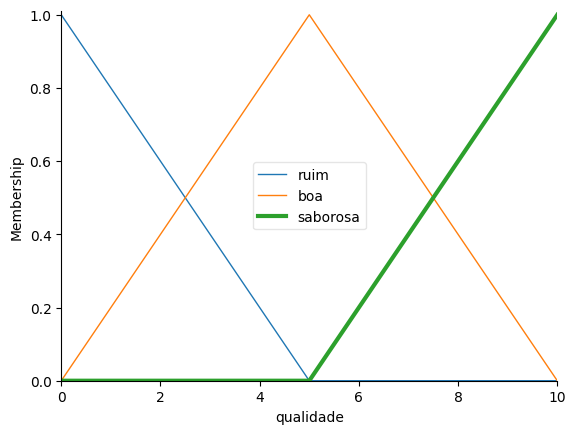

In [ ]:
qualidade['saborosa'].view()

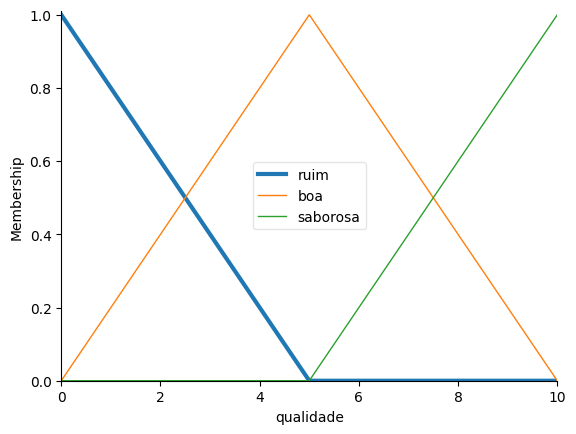

In [ ]:
qualidade['ruim'].view()

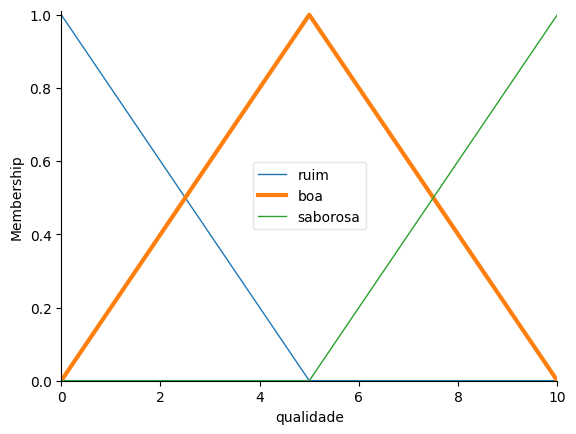

In [ ]:
qualidade['boa'].view()

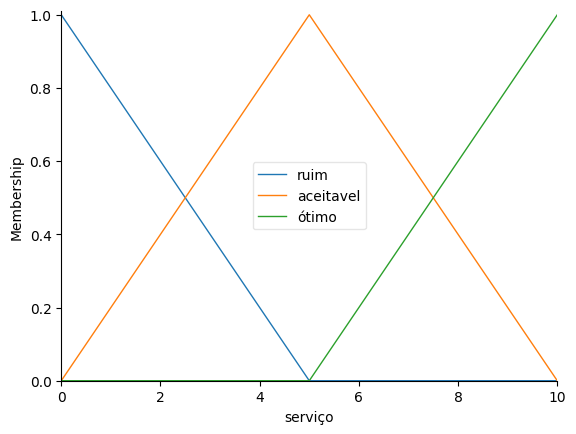

In [ ]:
servico.view()

In [ ]:
gorjeta['baixa']= fuzz.trimf(gorjeta.universe,[0,0,10])

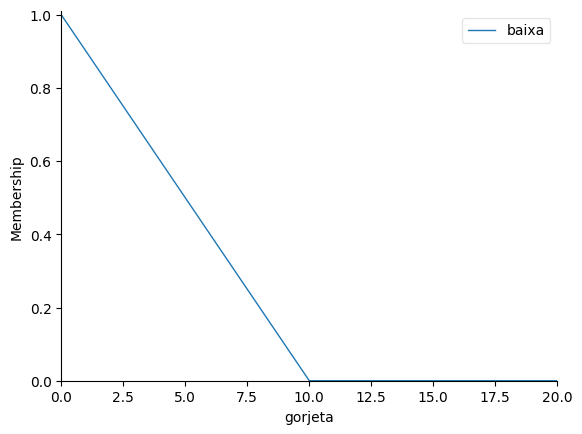

In [ ]:
gorjeta.view()

In [ ]:
gorjeta['media']= fuzz.trimf(gorjeta.universe,[0,10,20])

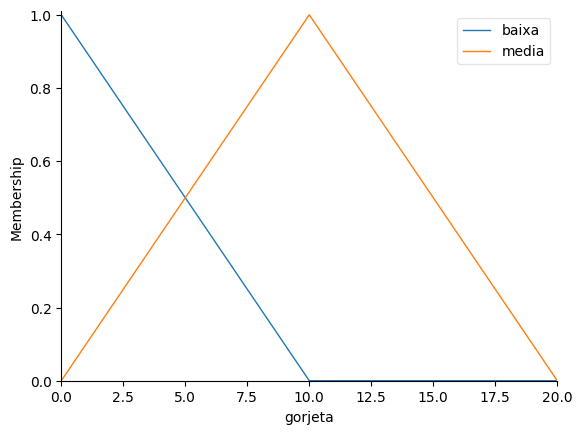

In [ ]:
gorjeta.view()

In [ ]:
gorjeta['Alta']= fuzz.trimf(gorjeta.universe,[10,20,20])

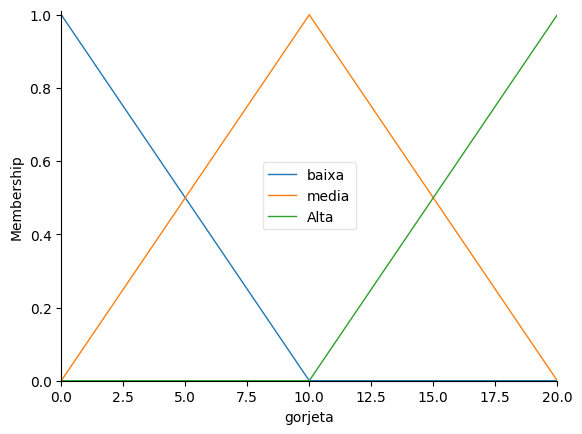

In [ ]:
gorjeta.view()

In [ ]:
regra1= ctrl.Rule(qualidade['ruim']| servico['ruim'], gorjeta['baixa'])
regra2= ctrl.Rule(servico['aceitavel'], gorjeta['media'])
regra3= ctrl.Rule(servico['ótimo']| qualidade['saborosa'], gorjeta['Alta'])

**Sistema de Controle**

In [ ]:
sistema_controle = ctrl.ControlSystem([regra1, regra2, regra3])

In [ ]:
sistema = ctrl.ControlSystemSimulation(sistema_controle)

In [ ]:
sistema.input['qualidade'] = 6.5

sistema.input['serviço'] = 7
sistema.compute()

10.753623188405797


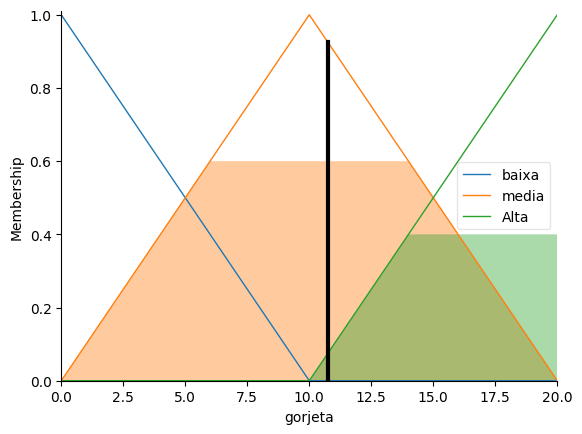

In [ ]:
print(sistema.output['gorjeta'])
gorjeta.view(sim = sistema)

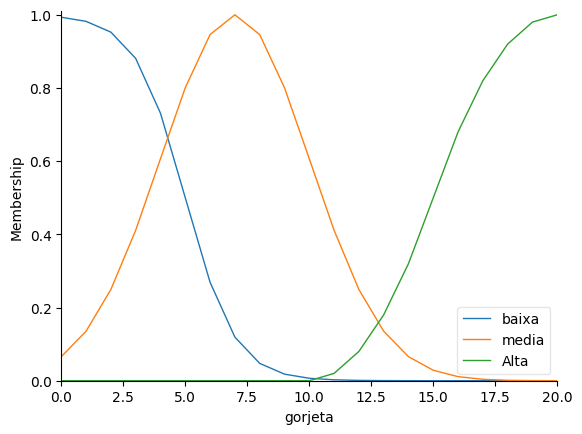

In [ ]:
gorjeta['baixa'] = fuzz.sigmf(gorjeta.universe, 5, -1)
gorjeta['media'] = fuzz.gaussmf(gorjeta.universe, 7, 3)
gorjeta['Alta'] = fuzz.pimf(gorjeta.universe, 10, 20,20,21)
gorjeta.view()

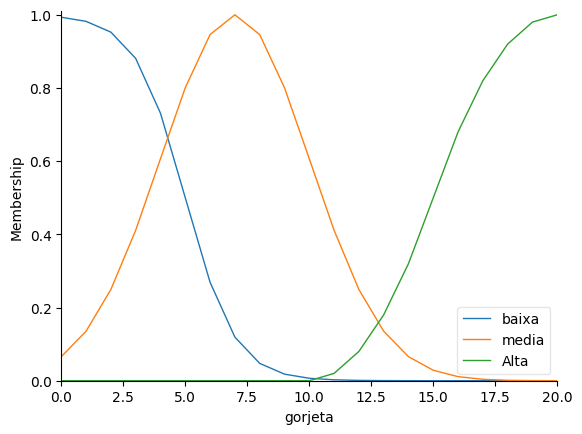

In [ ]:
gorjeta['baixa'] = fuzz.sigmf(gorjeta.universe, 5, -1)
gorjeta['media'] = fuzz.gaussmf(gorjeta.universe, 7, 3)
gorjeta['Alta'] = fuzz.pimf(gorjeta.universe, 10, 20,20,21)
gorjeta.view()

In [ ]:
regra1= ctrl.Rule(qualidade['ruim']| servico['ruim'], gorjeta['baixa'])
regra2= ctrl.Rule(servico['aceitavel'], gorjeta['media'])
regra3= ctrl.Rule(servico['ótimo']| qualidade['saborosa'], gorjeta['Alta'])

In [ ]:
sistema_controle = ctrl.ControlSystem([regra1, regra2, regra3])

In [ ]:
sistema = ctrl.ControlSystemSimulation(sistema_controle)

In [ ]:
sistema.input['qualidade'] = 6.5
sistema.input['serviço'] = 7
sistema.compute()

9.968577043980176


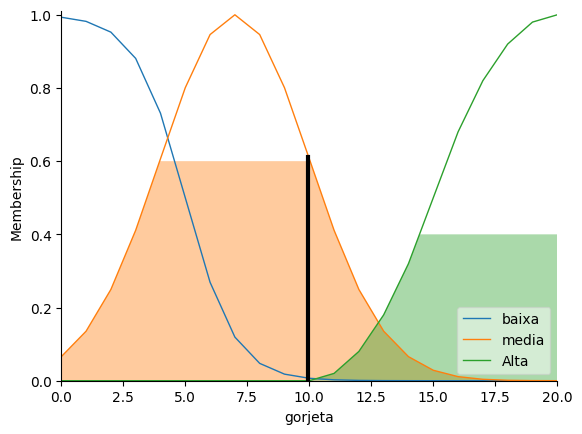

In [ ]:
print(sistema.output['gorjeta'])
gorjeta.view(sim=sistema)

# **Exemplo aspirador de pó!**


##**Antecendente (entradas)**
> Superficie: qual o nível de dificuldade da superficie. em uma escala de 0 a5


*   Fácil, moderada ou difícil

> Sujeira: qual a quantidade de sujeira, em uma escala de 0 a 5?


*   Leve, moderada ou pesada

##**Consequente (saída)**
> Sucção: qual o nível de sucção o aspirador de pó deve ser configurado, entre 0% e 10%?



*   baixa, média ou alta













In [ ]:
np.arange(0,6,1)
superficie = ctrl.Antecedent(np.arange(0,6,1), 'superficie')
sujeira = ctrl.Antecedent(np.arange(0,6,1),'sujeira')

In [ ]:
superficie.universe

array([0, 1, 2, 3, 4, 5])

In [ ]:
succao = ctrl.Consequent(np.arange(0,11,1),'succao')
succao.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

## Função de Pertinencia ⬇

In [ ]:
superficie.automf(number = 3, names = ['facil', 'moderada', 'dificil'])
sujeira.automf(number = 3, names = ['leve','moderada','pesada'])

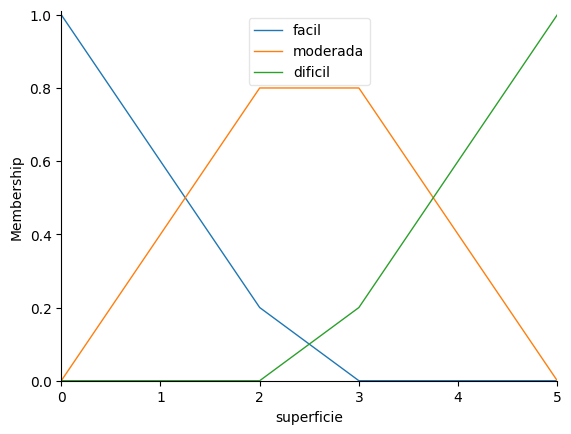

In [ ]:
superficie.view()

In [ ]:
#definimos agora os valores para cada função de pertinencia:
succao['baixa'] = fuzz.trimf(succao.universe, [0,0,5])
succao['media'] = fuzz.trimf(succao.universe,[0,5,10])
succao['alta'] = fuzz.trimf(succao.universe,[5,10,10])

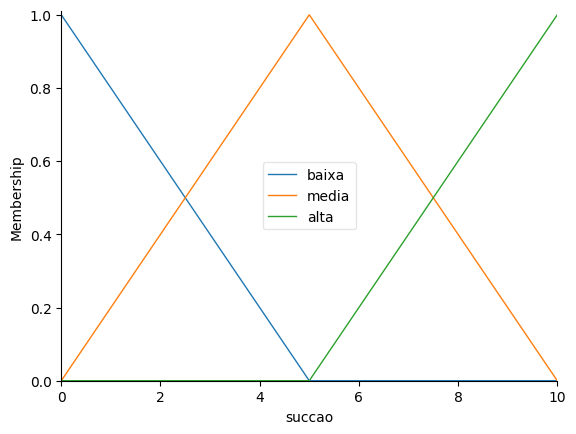

In [ ]:
succao.view()

In [ ]:
regra1 = ctrl.Rule(superficie['facil'] & sujeira['leve'], succao['baixa'])
regra2 = ctrl.Rule(superficie['moderada'] & sujeira['leve'], succao['media'])
regra3 = ctrl.Rule(superficie['dificil'] & sujeira['pesada'], succao['alta'])

## Sistema de Controle

In [ ]:
sistema_controle = ctrl.ControlSystem([regra1, regra2, regra3])
sistema = ctrl.ControlSystemSimulation(sistema_controle)

4.121951219512195


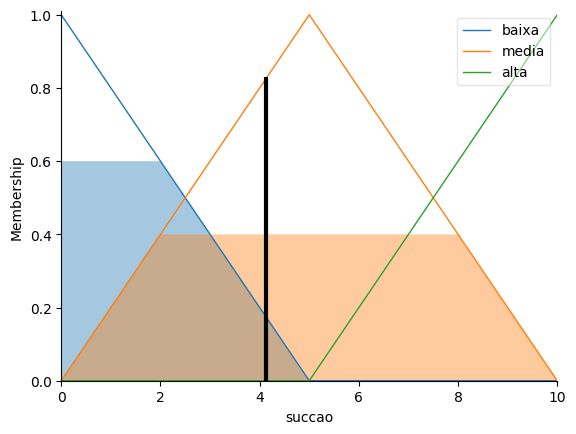

In [ ]:
sistema.input['superficie'] = 1
sistema.input['sujeira'] = 0.5
sistema.compute()
print(sistema.output['succao'])
succao.view(sim = sistema)

## Usando outras funções

In [ ]:
succao['baixa'] = fuzz.sigmf(succao.universe, 3, -2)
succao['media'] = fuzz.gaussmf(succao.universe, 5, 1)
succao['alta'] = fuzz.pimf(succao.universe, 5, 10, 10, 11)

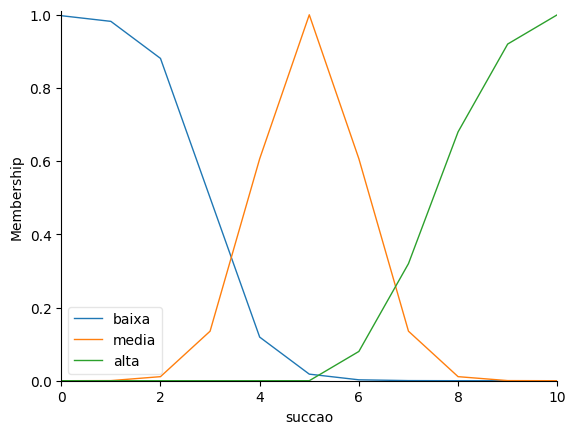

In [ ]:
succao.view()

In [ ]:
regra1 = ctrl.Rule(superficie['facil'] & sujeira['leve'], succao['baixa'])
regra2 = ctrl.Rule(superficie['moderada'] & sujeira['leve'], succao['media'])
regra3 = ctrl.Rule(superficie['dificil'] & sujeira['pesada'], succao['alta'])

In [ ]:
sistema_controle = ctrl.ControlSystem([regra1, regra2, regra3])
sistema = ctrl.ControlSystemSimulation(sistema_controle)

8.509333333333334


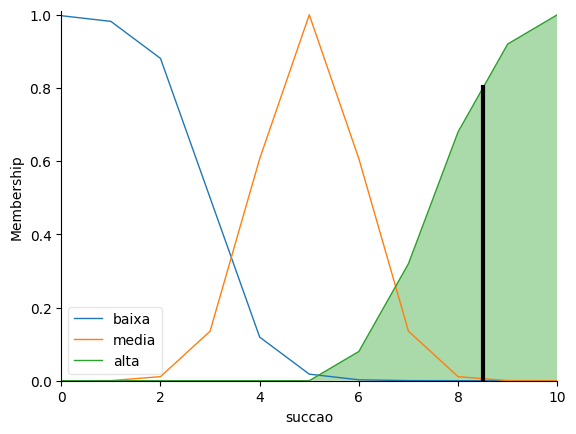

In [ ]:
sistema.input['superficie'] = 5
sistema.input['sujeira'] = 5
sistema.compute()
print(sistema.output['succao'])
succao.view(sim = sistema)